In [ ]:
library(tidyverse)
library(data.table)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [ ]:
library(repr)
options(repr.plot.width=7, repr.plot.height=7)

In [ ]:
#2
## https://drive.google.com/file/d/1YGxAXoHpMNe-Ou2OfdrCEvnVQQHVkxyS/view?usp=sharing

system("gdown --id 1YGxAXoHpMNe-Ou2OfdrCEvnVQQHVkxyS")

In [ ]:
system("ls",TRUE)

[1] "sample_data"       "titanic_train.csv"

In [ ]:
DF <- fread("/content/titanic_train.csv") %>% as_tibble()

In [ ]:
DF %>% show()

# A tibble: 891 × 12
   PassengerId Survived Pclass Name   Sex     Age SibSp Parch Ticket  Fare Cabin
         <int>    <int>  <int> <chr>  <chr> <dbl> <int> <int> <chr>  <dbl> <chr>
 1           1        0      3 Braun… male     22     1     0 A/5 2…  7.25 ""   
 2           2        1      1 Cumin… fema…    38     1     0 PC 17… 71.3  "C85"
 3           3        1      3 Heikk… fema…    26     0     0 STON/…  7.92 ""   
 4           4        1      1 Futre… fema…    35     1     0 113803 53.1  "C12…
 5           5        0      3 Allen… male     35     0     0 373450  8.05 ""   
 6           6        0      3 Moran… male     NA     0     0 330877  8.46 ""   
 7           7        0      1 McCar… male     54     0     0 17463  51.9  "E46"
 8           8        0      3 Palss… male      2     3     1 349909 21.1  ""   
 9           9        1      3 Johns… fema…    27     0     2 347742 11.1  ""   
10          10        1      2 Nasse… fema…    14     1     0 237736 30.1  ""   
# ℹ 881

In [ ]:
#3
DF %>% str()

tibble [891 × 12] (S3: tbl_df/tbl/data.frame)
 $ PassengerId: int [1:891] 1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int [1:891] 0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int [1:891] 3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr [1:891] "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr [1:891] "male" "female" "female" "female" ...
 $ Age        : num [1:891] 22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int [1:891] 1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int [1:891] 0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr [1:891] "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num [1:891] 7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr [1:891] "" "C85" "" "C123" ...
 $ Embarked   : chr [1:891] "S" "C" "S" "S" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [ ]:
DF <- select(DF,-PassengerId,-Name,-Cabin,-Ticket) %>%
  mutate_at(c("Survived","Pclass","Sex","Embarked"),factor)

In [ ]:
DF %>% str()
DF %>% show()

tibble [891 × 8] (S3: tbl_df/tbl/data.frame)
 $ Survived: Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass  : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num [1:891] 22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp   : int [1:891] 1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int [1:891] 0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num [1:891] 7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...
 - attr(*, ".internal.selfref")=<externalptr> 
# A tibble: 891 × 8
   Survived Pclass Sex      Age SibSp Parch  Fare Embarked
   <fct>    <fct>  <fct>  <dbl> <int> <int> <dbl> <fct>   
 1 0        3      male      22     1     0  7.25 S       
 2 1        1      female    38     1     0 71.3  C       
 3 1        3      female    26     0     0  7.92 S       
 4 1        1      female    35     1     0 53.1  S       
 5 0        3      male      35     0     0 

In [ ]:
#4
DF %>% summary()

 Survived Pclass      Sex           Age            SibSp           Parch       
 0:549    1:216   female:314   Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 1:342    2:184   male  :577   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
          3:491                Median :28.00   Median :0.000   Median :0.0000  
                               Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                               3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                               Max.   :80.00   Max.   :8.000   Max.   :6.0000  
                               NA's   :177                                     
      Fare        Embarked
 Min.   :  0.00    :  2   
 1st Qu.:  7.91   C:168   
 Median : 14.45   Q: 77   
 Mean   : 32.20   S:644   
 3rd Qu.: 31.00           
 Max.   :512.33           
                          

In [ ]:
table(is.na(DF))


FALSE  TRUE 
 6951   177 

In [ ]:
install.packages("Hmisc")
library(Hmisc)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




In [ ]:
DF$Age <- impute(DF$Age,median)  # mean, median, 특정숫자
DF %>% show()

# A tibble: 891 × 8
   Survived Pclass Sex    Age      SibSp Parch  Fare Embarked
   <fct>    <fct>  <fct>  <impute> <int> <int> <dbl> <fct>   
 1 0        3      male   22           1     0  7.25 S       
 2 1        1      female 38           1     0 71.3  C       
 3 1        3      female 26           0     0  7.92 S       
 4 1        1      female 35           1     0 53.1  S       
 5 0        3      male   35           0     0  8.05 S       
 6 0        3      male   28           0     0  8.46 Q       
 7 0        1      male   54           0     0 51.9  S       
 8 0        3      male    2           3     1 21.1  S       
 9 1        3      female 27           0     2 11.1  S       
10 1        2      female 14           1     0 30.1  C       
# ℹ 881 more rows


In [ ]:
#5
install.packages("gmodels")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
print("Survived와 pclass의 연관 관계")
gmodels::CrossTable(DF$Survived,DF$Pclass,
                    chisq = T, #카이제곱 검정
                    expected = T, #기대값(E)표시
                    prop.r = F, prop.c = F) #각 셀의 비율 표시

[1] "Survived와 pclass의 연관 관계"

 
   Cell Contents
|-------------------------|
|                       N |
|              Expected N |
| Chi-square contribution |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  891 

 
             | DF$Pclass 
 DF$Survived |         1 |         2 |         3 | Row Total | 
-------------|-----------|-----------|-----------|-----------|
           0 |        80 |        97 |       372 |       549 | 
             |   133.091 |   113.374 |   302.535 |           | 
             |    21.178 |     2.365 |    15.950 |           | 
             |     0.090 |     0.109 |     0.418 |           | 
-------------|-----------|-----------|-----------|-----------|
           1 |       136 |        87 |       119 |       342 | 
             |    82.909 |    70.626 |   188.465 |           | 
             |    33.997 |     3.796 |    25.603 |           | 
             |     0.153 |     0.098 |     0.134 |           | 
-------------

In [ ]:
print("Survived와 Sex의 연관 관계")
gmodels::CrossTable(DF$Survived, DF$Sex,
chisq = T,
expected = T,
prop.r=F,prop.c=F)

[1] "Survived와 Sex의 연관 관계"

 
   Cell Contents
|-------------------------|
|                       N |
|              Expected N |
| Chi-square contribution |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  891 

 
             | DF$Sex 
 DF$Survived |    female |      male | Row Total | 
-------------|-----------|-----------|-----------|
           0 |        81 |       468 |       549 | 
             |   193.475 |   355.525 |           | 
             |    65.386 |    35.583 |           | 
             |     0.091 |     0.525 |           | 
-------------|-----------|-----------|-----------|
           1 |       233 |       109 |       342 | 
             |   120.525 |   221.475 |           | 
             |   104.962 |    57.120 |           | 
             |     0.262 |     0.122 |           | 
-------------|-----------|-----------|-----------|
Column Total |       314 |       577 |       891 | 
-------------|-----------|-----------|----------

In [ ]:
#6
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘future’, ‘future.apply’, ‘lava’, ‘prodlim’, ‘clock’, ‘hardhat’, ‘ipred’, ‘e1071’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [ ]:
index <- caret::createDataPartition(y=DF$Survived,p=0.9,list=FALSE)
train <- DF[index, ]
test <- DF[-index, ]

train %>% show()
test %>% show()

# A tibble: 803 × 8
   Survived Pclass Sex    Age      SibSp Parch  Fare Embarked
   <fct>    <fct>  <fct>  <impute> <int> <int> <dbl> <fct>   
 1 0        3      male   22           1     0  7.25 S       
 2 1        1      female 38           1     0 71.3  C       
 3 1        3      female 26           0     0  7.92 S       
 4 1        1      female 35           1     0 53.1  S       
 5 0        3      male   35           0     0  8.05 S       
 6 0        3      male   28           0     0  8.46 Q       
 7 0        1      male   54           0     0 51.9  S       
 8 0        3      male    2           3     1 21.1  S       
 9 1        3      female 27           0     2 11.1  S       
10 1        2      female 14           1     0 30.1  C       
# ℹ 793 more rows
# A tibble: 88 × 8
   Survived Pclass Sex    Age      SibSp Parch  Fare Embarked
   <fct>    <fct>  <fct>  <impute> <int> <int> <dbl> <fct>   
 1 0        3      male   28           0     0  8.05 S       
 2 1        3

In [ ]:
#7
m <- glm(Survived ~ ., data = train, family="binomial")
summary(m)


Call:
glm(formula = Survived ~ ., family = "binomial", data = train)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  14.949682 535.411305   0.028  0.97772    
Pclass2      -0.944253   0.307570  -3.070  0.00214 ** 
Pclass3      -2.196256   0.312502  -7.028 2.10e-12 ***
Sexmale      -2.665695   0.210307 -12.675  < 2e-16 ***
Age          -0.041254   0.008317  -4.960 7.04e-07 ***
SibSp        -0.323645   0.116891  -2.769  0.00563 ** 
Parch        -0.021920   0.123524  -0.177  0.85915    
Fare          0.002301   0.002523   0.912  0.36182    
EmbarkedC   -10.827563 535.411256  -0.020  0.98387    
EmbarkedQ   -10.911729 535.411324  -0.020  0.98374    
EmbarkedS   -11.269873 535.411241  -0.021  0.98321    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1069.24  on 802  degrees of freedom
Residual deviance:  709.09  on 792  degrees of freedom
AIC: 731.09

Number

In [ ]:
#8
mback <- step(m,direction="backward")

Start:  AIC=731.09
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked

           Df Deviance    AIC
- Embarked  3   712.84 728.84
- Parch     1   709.12 729.12
- Fare      1   709.99 729.99
<none>          709.09 731.09
- SibSp     1   717.97 737.97
- Age       1   735.90 755.90
- Pclass    2   765.85 783.85
- Sex       1   908.90 928.90

Step:  AIC=728.84
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare

         Df Deviance    AIC
- Parch   1   712.96 726.96
- Fare    1   714.47 728.47
<none>        712.84 728.84
- SibSp   1   723.36 737.36
- Age     1   741.13 755.13
- Pclass  2   771.58 783.58
- Sex     1   925.14 939.14

Step:  AIC=726.96
Survived ~ Pclass + Sex + Age + SibSp + Fare

         Df Deviance    AIC
- Fare    1   714.47 726.47
<none>        712.96 726.96
- SibSp   1   725.45 737.45
- Age     1   741.19 753.19
- Pclass  2   773.66 783.66
- Sex     1   929.84 941.84

Step:  AIC=726.47
Survived ~ Pclass + Sex + Age + SibSp

         Df Deviance    AIC
<n

In [ ]:
summary(mback)


Call:
glm(formula = Survived ~ Pclass + Sex + Age + SibSp, family = "binomial", 
    data = train)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  4.105311   0.419685   9.782  < 2e-16 ***
Pclass2     -1.206767   0.271084  -4.452 8.52e-06 ***
Pclass3     -2.405538   0.257021  -9.359  < 2e-16 ***
Sexmale     -2.713700   0.204184 -13.290  < 2e-16 ***
Age         -0.042769   0.008259  -5.178 2.24e-07 ***
SibSp       -0.336979   0.109600  -3.075  0.00211 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1069.24  on 802  degrees of freedom
Residual deviance:  714.47  on 797  degrees of freedom
AIC: 726.47

Number of Fisher Scoring iterations: 5


In [ ]:
#9
predict_value <- predict(mback,test,type="response") %>% tibble(predict_value = .)
predict_value %>% show()

# A tibble: 88 × 1
   predict_value
           <dbl>
 1        0.0987
 2        0.623 
 3        0.200 
 4        0.603 
 5        0.0950
 6        0.623 
 7        0.327 
 8        0.0987
 9        0.601 
10        0.0813
# ℹ 78 more rows


In [ ]:
#10
predict_check <- test %>% select(Survived) %>% dplyr::bind_cols(.,predict_value)
predict_check %>% show()

# A tibble: 88 × 2
   Survived predict_value
   <fct>            <dbl>
 1 0               0.0987
 2 1               0.623 
 3 0               0.200 
 4 1               0.603 
 5 1               0.0950
 6 1               0.623 
 7 1               0.327 
 8 0               0.0987
 9 1               0.601 
10 0               0.0813
# ℹ 78 more rows


In [ ]:
#11
predict_cutoff_5 <- predict_check %>%
  mutate(predict_Survived= as.factor(ifelse(predict_value > 0.5, 1, 0)))
predict_cutoff_5 %>% show()

# A tibble: 88 × 3
   Survived predict_value predict_Survived
   <fct>            <dbl> <fct>           
 1 0               0.0987 0               
 2 1               0.623  1               
 3 0               0.200  0               
 4 1               0.603  1               
 5 1               0.0950 0               
 6 1               0.623  1               
 7 1               0.327  0               
 8 0               0.0987 0               
 9 1               0.601  1               
10 0               0.0813 0               
# ℹ 78 more rows


In [ ]:
#12
install.packages("pROC")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Setting levels: control = 0, case = 1

Setting direction: controls < cases



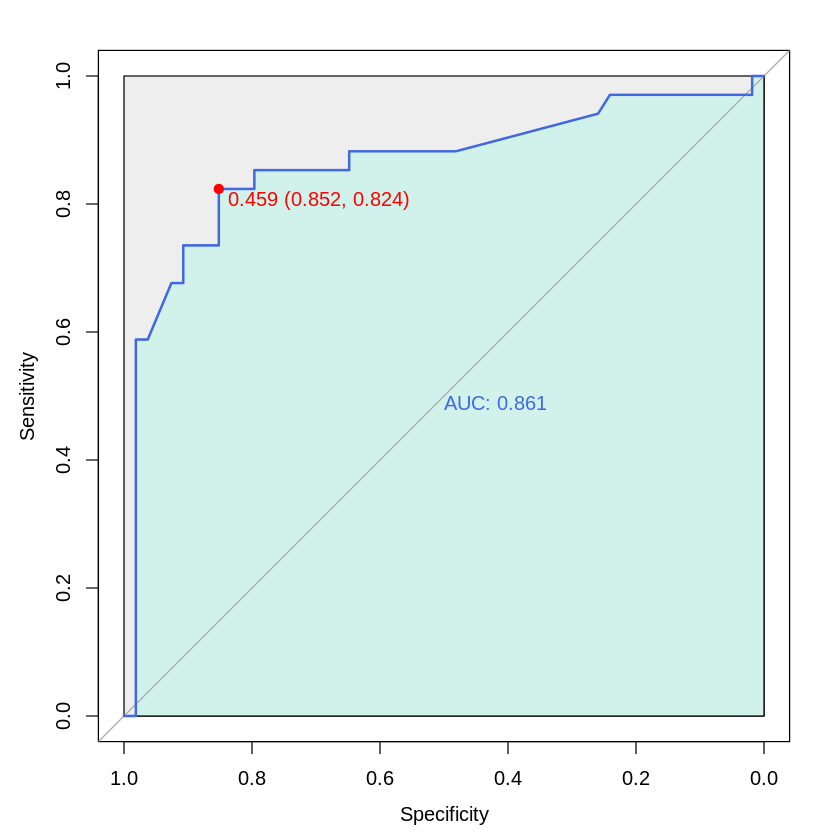

In [ ]:
roc_c <- pROC::roc(predict_check$Survived,predict_check$predict_value)
pROC::plot.roc(roc_c,
              col="royalblue",
              print.auc=TRUE,
              max.auc.polygon=TRUE,
              print.thres=TRUE, print.thres.pch=19, print.thres.col="red",
              auc.polygon=TRUE,auc.polygon.col="#D1F2EB")

In [ ]:
#13
pROC::coords(roc_c,"best",ret="threshold",transpose=F)

threshold
<dbl>
0.4588671


In [ ]:
predict_cutoff_roc <- predict_check %>%
  mutate(predict_Survived = as.factor(ifelse(predict_value > 0.4588671,1,0)))
predict_cutoff_roc %>% show()

# A tibble: 88 × 3
   Survived predict_value predict_Survived
   <fct>            <dbl> <fct>           
 1 0               0.0987 0               
 2 1               0.623  1               
 3 0               0.200  0               
 4 1               0.603  1               
 5 1               0.0950 0               
 6 1               0.623  1               
 7 1               0.327  0               
 8 0               0.0987 0               
 9 1               0.601  1               
10 0               0.0813 0               
# ℹ 78 more rows


Setting levels: control = 0, case = 1

Setting direction: controls < cases



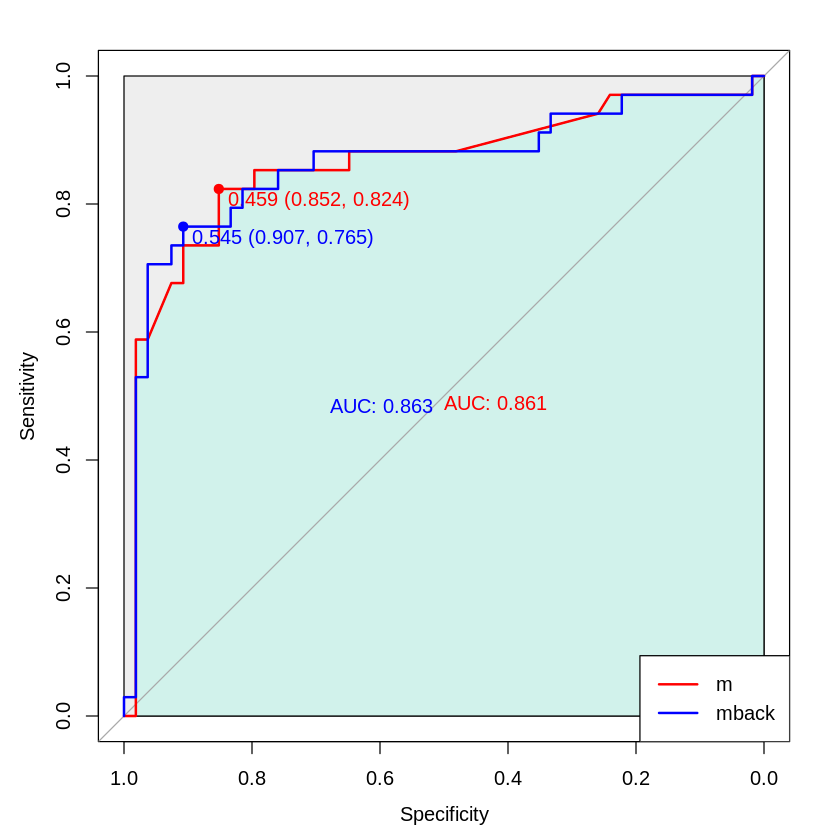

In [ ]:
#14
predict_value_mback <- predict(m, test, type = "response") %>%
 tibble(predict_value = .)
predict_check_mback <- test %>%
 select(Survived) %>%
 dplyr::bind_cols(., predict_value_mback)


roc_c_mback <- pROC::roc(predict_check_mback$Survived, predict_check_mback$predict_value)


pROC::plot.roc(roc_c, col = "red", print.auc=T, max.auc.polygon=T, print.thres=T, print.thres.pch=19, print.thres.col = "red", auc.polygon=T, auc.polygon.col="#D1F2EB")
pROC::plot.roc(roc_c_mback, add=T, # 기본 그래프에 추가할 수 있도록 설정
 col="blue", print.auc=T, print.auc.adj=c(1.11,1.2), print.thres=T, print.thres.pch=19, print.thres.col = "blue")
legend("bottomright", legend=c("m", "mback"), col=c("red", "blue"), lwd = 2)


In [ ]:
#15
caret::confusionMatrix(predict_cutoff_roc$Survived,predict_cutoff_roc$predict_Survived)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 46  8
         1  6 28
                                          
               Accuracy : 0.8409          
                 95% CI : (0.7475, 0.9102)
    No Information Rate : 0.5909          
    P-Value [Acc > NIR] : 3.965e-07       
                                          
                  Kappa : 0.6681          
                                          
 Mcnemar's Test P-Value : 0.7893          
                                          
            Sensitivity : 0.8846          
            Specificity : 0.7778          
         Pos Pred Value : 0.8519          
         Neg Pred Value : 0.8235          
             Prevalence : 0.5909          
         Detection Rate : 0.5227          
   Detection Prevalence : 0.6136          
      Balanced Accuracy : 0.8312          
                                          
       'Positive' Class : 0               
                                    